In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# A.

In [79]:
def I(N11, N10, N01, N00):
    
    arr = np.array([N11, N10, N01, N00])
    
    N = arr.sum()
    
    N1_ = (N11 + N10)
    N_1 = (N11 + N01)
    N0_ = (N01 + N00)
    N_0 = (N10 + N00)
    
    var1 = (N11/N) * np.log2( (N*N11) / (N1_ * N_1) )
    
    var2 = (N01/N) * np.log2( (N*N01) / (N0_ * N_1) )
    
    var3 = (N10/N) * np.log2( (N*N10) / (N1_ * N_0) )
    
    var4 = (N00/N) * np.log2( (N*N00) / (N0_ * N_0) )
    
    
    return var1 + var2 + var3 + var4
    
                        

In [81]:
prize = I(150, 10, 1_000, 15_000)
hello = I(155, 5, 14_000, 1_000)

print('prize', round(prize))
print('hello', round(hello))

prize 0.032960118763953966
hello 0.0001872237395595837


# B. 

In [71]:
np.random.seed(6704)
f0 = np.random.normal(0, 1, 100)
f1 = np.random.normal(1.5, np.sqrt(1.1), 200)

arr = np.append(f0, f1)

In [72]:
w = []

count = 0
for i in range(len(arr)):
    
    if count == 0:
        w.append(0)
        count += 1
        continue
    
    Lf0 = norm.pdf(arr[i], loc=0, scale=1)
    Lf1 = norm.pdf(arr[i], loc=1.5, scale=1.1)
    
    LL = np.log(Lf1/ Lf0)
    
    x = w[i-1] + LL
    
    wt = np.max([x, 0])
    
    w.append(wt)
    
    

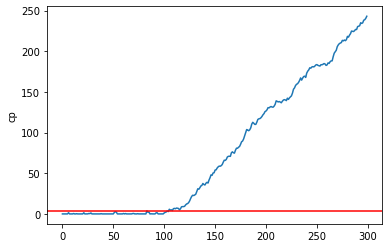

In [73]:
df = pd.DataFrame({'cp':w})
ax = sns.lineplot(data=df, y='cp', x=df.index, )
ax.axhline(3, c='r')

In [74]:
fig = ax.get_figure()
fig.savefig('img/part1_b.png')

In [75]:
df= pd.DataFrame({'cp':w})
df.query("cp > 3")

cp
83     3.815542
103    3.640571
105    5.731734
106    4.621871
107    5.121379
..          ...
295  234.943879
296  238.171269
297  238.780746
298  240.453685
299  243.060890

[197 rows x 1 columns]

In [ ]:
norm.pdf()

In [39]:
np.sqrt(1.1)

1.0488088481701516